In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from math import sqrt

1. Write a function getDistances(A) that computes, for a numeric data matrixA(numpyarray), a distance matrix such asWseen in the lecture. The matrix does not need tocontain non-zero elements below the diagonal.

In [2]:
def getDistances(A):
    rows, columns = A.shape
    matrix = np.zeros((rows,rows))
    
    for i, val in enumerate(A): 
        for j, val in enumerate(A):
            if(matrix[j][i] == 0):
                dist = np.linalg.norm(A[i]-A[j])
                matrix[i][j] = dist
    
    return matrix
        
D = pd.read_csv("iris.csv")
A = getDistances(D._get_numeric_data().values)
print(A)

[[0.         0.53851648 0.50990195 ... 4.45982062 4.65080638 4.14004831]
 [0.         0.         0.3        ... 4.49888875 4.71805044 4.15331193]
 [0.         0.         0.         ... 4.66154481 4.84871117 4.29883705]
 ...
 [0.         0.         0.         ... 0.         0.6164414  0.64031242]
 [0.         0.         0.         ... 0.         0.         0.76811457]
 [0.         0.         0.         ... 0.         0.         0.        ]]


2.Write a function plotClusters(A, C, dimX, dimY, dimZ = None, ax = None) that
takes a numeric array A and a list C of cluster IDs such that the i-th element of C is the
identifier (number or string) of the cluster for the i-th datapoint in A. That is, all entries
of A with the same cluster ID w.r.t. C are in the same cluster. The function should
create a scatter plot of the points of D in the attributes dimX and dimY; if dimZ is not
None, use a 3D plot and use dimZ as the third dimension. Create a new figure only if
no axis object is given. Return the axis object in which you draw the plot. The list C
should be used to use different colors/forms for the points in the different clusters.

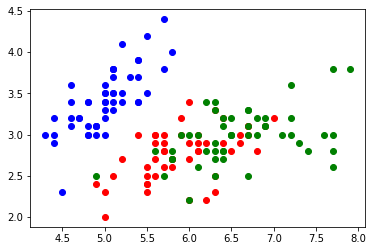

In [3]:
def plotClusters(A, C, dimX, dimY, dimZ = None, ax = None):
    rows, columns = A.shape
    
    cluster_ids = np.unique(C)
    clusters = []
    
    for i, val in enumerate(cluster_ids): 
        condition = (C == cluster_ids[i])
        clusters.append(A[condition])
        
    colors = ['blue', 'red', 'green', 'orange', 'yellow']

    if dimZ is None:
        if ax is None:
            fig, ax = plt.subplots()
        
        for i, val in enumerate(clusters): 
            ax.scatter(clusters[i][:,D.columns.get_loc(dimX)], clusters[i][:,D.columns.get_loc(dimY)], c = colors[i], label=C[i])
    else:
        if ax is None:
            fig = plt.figure()
            ax = plt.axes(projection='3d')
        
        for i, val in enumerate(clusters): 
            clusters[i] = clusters[i][:, [D.columns.get_loc(dimX), D.columns.get_loc(dimY), D.columns.get_loc(dimZ)]]
            
        for i, val in enumerate(clusters): 
            xvals, yvals, zvals = zip(*clusters[i])
            
            ax.scatter3D(xvals, yvals, zvals, c=colors[i]);
            
            ax.set_xlabel(dimX)
            ax.set_ylabel(dimY)
            ax.set_zlabel(dimZ);
            
    return ax
        

C = D.iloc[:,4].values
A = D._get_numeric_data().values

fig, ax = plt.subplots()
plotClusters(A, C, 'sepal_length', 'sepal_width', None, ax)

#ax = plt.axes(projection='3d')
#plotClusters(A, C, 'sepal_length', 'sepal_width', 'petal_width', ax)
    

Exercise 3 (5 Points) In the following exercises, D represents an n × n distance matrix,
C represents an iterable (for example a list or a numpy array) of n integers or strings. The
different values correspond to different clusters, and all indices with the same values are located
within the same cluster.

1. Write a function getW(D, U, V) that computes the sum of weights of pairs of points in
U and V respectively; U and V are lists of integers corresponding to the indices of points
in D.

In [4]:
def getW(D, U, V):
    rows, columns = D.shape
    
    w = 0
    for i in range(len(U)):
        for j in range(len(V)):
                w += D[i][j]
                #w += D[j][i] 
    return w
    
M = pd.read_csv("iris.csv")
D = getDistances(M._get_numeric_data().values)

U = [0, 1, 2, 3, 4, 30, 60]
V = [5, 6, 7, 8, 9, 10, 71, 75]

W = getW(D, U, V)

print(W)

14.99365041470766


2. Write functions getWIn(D, C) and getWOut(D, C) that compute the metrics Win and
Wout seen in the lecture. Write functions getNIn(C) and getNOut(C) that compute the
metrics Nin and Nout seen in the lecture.


In [5]:
def getWIn(D, C):
    cluster_ids = np.unique(C)
    
    win = 0
    for i, val in enumerate(cluster_ids): 
        condition = (C == val)
        win += getW(D, np.where(condition)[0], np.where(condition)[0])
        
    return win/2
    
def getWOut(D, C):
    cluster_ids = np.unique(C)
    
    wout = 0
    for i, val in enumerate(cluster_ids): 
        condition = (C == val)
        condition2 = (C != val)
        wout += getW(D, np.where(condition)[0], np.where(condition2)[0])
        
    return wout/2

# import operator as op
# from functools import reduce

# def ncr(n, r):
#     r = min(r, n-r)
#     numer = reduce(op.mul, range(n, n-r, -1), 1)
#     denom = reduce(op.mul, range(1, r+1), 1)
#     return numer // denom  # or / in Python 2

def getNIn(C):
    cluster_ids = np.unique(C)

    nin = 0
    for i in range(len(cluster_ids)):
        condition = (C == cluster_ids[i])
        cluster = np.where(condition)[0]
        ni = len(cluster)
        nin += ni*(ni-1)
        
    return nin/2
        
def getNOut(C):
    cluster_ids = np.unique(C)
    
    nout = 0
    
    for i in range(len(cluster_ids)):
        for j in range(len(cluster_ids)):
            if i != j:
                condition = (C == cluster_ids[i])
                condition2 = (C == cluster_ids[j])

                cluster1 = np.where(condition)[0]
                cluster2 = np.where(condition2)[0]
            
                nout += len(cluster1) * len(cluster2)
   
    return nout/2
            

iris_data = pd.read_csv("iris.csv")
D = getDistances(iris_data._get_numeric_data().values)
C = iris_data.iloc[:,4].values

WIn = getWIn(D, C)
print('WIn: ' + str(WIn))

WOut = getWOut(D, C)
print('WOut: ' + str(WOut))

NIn = getNIn(C)
print('NIn: ' + str(NIn))

NOut = getNOut(C)
print('NOut: ' + str(NOut))

WIn: 1282.7990700770922
WOut: 13651.803527071326
NIn: 3675.0
NOut: 7500.0


3 Write functions getBetaCV(D, C), getCIndex(D, C), getNormalizedCut(D, C),
getModularity(D, C), getDunn(D, C), getDaviesBouldin(D, C),
getSilhouette(D, C), which compute the respective measures. Add a function getMetric(D,
C, metric) that receives a string metric and, depending on the name in {beta, cindex,
nc, mod, dunn, db, sil}, it returns the result of one of the above functions.

In [6]:
def getBetaCV(D, C):
    return (getWIn(D, C)/getNIn(C))/(getWOut(D, C)/getNOut(C))

def getCIndex(D, C):
    nin = int(getNIn(C))
    #wmin_nin = np.sum(np.sort(D[D!=0].flatten())[:nin])
    
    # Con esto me da negativo, debido a que Wmin(nin) es mayor a Win
    upper_diagonal = D[np.triu_indices(150, k = 1)]
    wmin_nin = np.sum(np.sort(upper_diagonal)[:nin])
    
    # Con esto tiene mas sentido, pero ¿porque??. No deberian tomarse los ceros debajo de la diagonal, solo lo que esta arriba.
    #wmin_nin = np.sum(np.sort(np.triu(D).flatten())[:nin])
    
    wmax_nin = np.sum(np.sort(D.flatten())[-nin:])
    
    win = getWIn(D, C)
    
    return (win - wmin_nin)/(wmax_nin - wmin_nin)

def getNormalizedCut(D, C):
    cluster_ids = np.unique(C)
    
    norm_cut = 0
    for i, val in enumerate(cluster_ids):
        condition = (C == cluster_ids[i])
        condition2 = (C != val)
        
        w_ci_cicomp  = getW(D, np.where(condition)[0], np.where(condition2)[0])
        w_ci_vol  = getW(D, np.where(condition)[0],  np.arange(0, len(D), 1))
        
        norm_cut += w_ci_cicomp / w_ci_vol
        
    return norm_cut

def getModularity(D, C):
    cluster_ids = np.unique(C)
    
    # ¿Puede el modularity ser negativo?
    modularity = 0
    for i, val in enumerate(cluster_ids):
        condition = (C == cluster_ids[i])
        
        w_ci_ci = getW(D, np.where(condition)[0],  np.where(condition)[0])
        w_ci_v = getW(D, np.where(condition)[0],  np.arange(0, len(D), 1))
        w_v_v = getW(D, np.arange(0, len(D), 1),  np.arange(0, len(D), 1))
        
        modularity += (w_ci_ci/w_v_v) - pow(w_ci_v/w_v_v, 2)
        
    return modularity
     
def getDunn(D, C):
    cluster_ids = np.unique(C)
    
    wmin_out = np.Inf
    wmax_in = 0
    for i, val in enumerate(cluster_ids): 
        condition = (C == val)
        condition2 = (C != val)
        
        w_ci_ci = getW(D, np.where(condition)[0], np.where(condition)[0])
        w_ci_cj = getW(D, np.where(condition)[0], np.where(condition2)[0])
        
        if(wmin_out > w_ci_cj):
            wmin_out = w_ci_cj
            
        if(wmax_in < w_ci_ci):
            wmax_in = w_ci_ci
    
    return wmin_out/wmax_in

def getDaviesBouldin(A, C):
    cluster_ids = np.unique(C)
    
    cluster_means = []
    cluster_stds = []
    
    for i, val in enumerate(cluster_ids):
        condition = (C == val)
        
        arr_means = A[condition].mean(axis=0)
        cluster_means.append(arr_means)
        
        dist = 0
        for j, val in enumerate(A[condition]):
            dist += pow(np.linalg.norm(val-arr_means), 2)
        
        std = sqrt(dist/len(A[condition]))
        cluster_stds.append(std)
        
    DBIndex = 0
    for i in range(len(cluster_ids)):
        maxDB = 0
        for j in range(len(cluster_ids)):
            if(i != j):
                DB = (cluster_stds[i] + cluster_stds[j])/np.linalg.norm(cluster_means[i]-cluster_means[j])
                if maxDB < DB:
                    maxDB = DB
        DBIndex += maxDB
        
    return DBIndex/len(cluster_ids)

def getSilhouette(A, C):
    cluster_ids = np.unique(C)
    
    silhouette = 0
    for i, cluster_i in enumerate(cluster_ids):
        condition = (C == cluster_i)
        for j, val_xj in enumerate(A[condition]):
            
            dist_in = 0
            for k, val_xk in enumerate(A[condition]):
                if j != k:
                    dist_in += np.linalg.norm(val_xj-val_xk)
                    
            u_in = dist_in/(len(A[condition]) - 1)
            
            
            umin_out = np.Inf
            for m, cluster_m in enumerate(cluster_ids):
                if m != i:
                    condition2 = (C == cluster_m)
                    dist_out = 0
                    for n, val_xn in enumerate(A[condition2]):
                        dist_out += np.linalg.norm(val_xj-val_xn)
                    mean_out = dist_out/len(A[condition2])
                    if umin_out > mean_out:
                        umin_out = mean_out
            
            si = umin_out - u_in/max(umin_out, u_in)
            silhouette += si
    
    return silhouette/len(A)
    
    

iris_data = pd.read_csv("iris.csv")
D = getDistances(iris_data._get_numeric_data().values)
C = iris_data.iloc[:,4].values

CV = getBetaCV(D, C)
print('Beta CV Measure: ' + str(CV))

CIndex = getCIndex(D, C)
print('C Index: ' + str(CIndex))

NormalizedCut = getNormalizedCut(D, C)
print('Normalized Cut: ' + str(NormalizedCut))

Modularity = getModularity(D, C)
print('Modularity: ' + str(Modularity))

Dunn = getDunn(D, C)
print('Dunn Index: ' + str(Dunn))

A = iris_data._get_numeric_data().values

DaviesBouldin = getDaviesBouldin(A, C)
print('Davies Bouldin Index: ' + str(DaviesBouldin))

Silhouette = getSilhouette(A, C)
print('Silhouette Index: ' + str(Silhouette))

Beta CV Measure: 0.19176640512590487
C Index: -0.11659612336649496
Normalized Cut: 1.2905072982034829
Modularity: -1.571589276973021
Dunn Index: 10.642199425862458
Davies Bouldin Index: 0.8445815484442535
Silhouette Index: 1.8190908007384943
